 Python Project - Marvel Mart Project

 Duke Denham

 March 14th, 2021

In [1]:
# This code imports the libraries used for the project and runs differenet code to alter visualization display settings,
# ignore warnings, and turn off scientific notation. 

import csv
import itertools
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import csv
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%config InlineBackend.print_figure_kwargs={'facecolor' : 'w'}
import seaborn as sns
sns.set(style='ticks',palette='Set2')
import scipy.stats
%matplotlib inLine
import warnings
warnings.filterwarnings('ignore')
from textwrap import wrap

## Part 1: Cleaning the Data

In [4]:
# This code imports the csv dataset as a DataFrame called sales using pandas and read_csv(). It then prints the shape of
# the DataFrame. A sum of all empty cells in each column is calculated and printed using isna().sum(). This will be helpful
# when cleaning the data for missing data. Out of all the columns that need to be cleaned, Country and Order ID don't need
# to be cleaned for missing data.

sales = pd.read_csv('ProjectDS/MM_Sales.csv')
print(sales.shape)
sumNA = sales.isna().sum()
print(sumNA)

(50000, 14)
Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [5]:
# This code displays the first 5 rows of the dataset and the type of data that's in each column. This is useful for getting
# a general overview of the dataset and for changing incorrect/missing values when cleaning the data.

display(sales.head())
print(sales.dtypes)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.70,117.11,406257.50,231292.25,174965.25


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


In [6]:
# This code creates a DataFrame that's a copy of sales called salesClean using copy(). It will store the cleaned data. This
# is done so that no edits are made to the original DataFrame.

salesClean = sales.copy()

In [7]:
# This code tests how many rows have erroneous data for Country and changes the values to "NULL" for those rows. It first
# sets a variable called count that equals 0 and will be used to count how many rows are erroneous. It then sets up a FOR
# loop that iterates through each row in salesClean using iterrows(). A TRY clause is used to try change the value in
# column Country to a float for the row. If it can be changed, the value is erroneous because it's a number. It then
# changes the value to "NULL". It then prints the new value and adds 1 to the count variable. If the Country value can't be
# turned into a float, nothing is wrong with the data, and it goes to the except clause where nothing happens. A statement
# is printed that states how many rows had erroneous data for Country by concatenating count into it.

print("Testing for and changing erroneous data in Country.")

count = 0

for index, row in salesClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        salesClean.loc[int(index), 'Country'] = 'NULL'
        print(salesClean.loc[int(index), 'Country'])
        count+=1
    except:
        None
        

print(f"Erroneous Country: {count}")

Testing for and changing erroneous data in Country.
NULL
NULL
NULL
Erroneous Country: 3


In [8]:
# This code tests for and changes erroneous data for the Order Priority column using similar methods from before. One difference
# is isna() is used to check whether the cell in Order Priority is empty. If it is, it's changed to 'NULL', printed, and 1
# is added to count. If it isn't, the iteration goes to the EXCEPT clause where an IF statement is used to check if the
# value in Order Priority is not equal to a valid priority code. If it isn't, the value is changed to 'NULL', printed, and
# 1 is added to count. Lastly, a statement stating how many rows were erroneous is printed.

print("Testing for and changing erroneous data in Order Priority.")

count = 0

for index, row in salesClean.iterrows():
    try:
        row.loc['Order Priority'] = row.loc['Order Priority'].isna()
        salesClean.loc[int(index), 'Order Priority'] = 'NULL'
        print(salesClean.loc[int(index), 'Order Priority'])
        count+=1
    except:
        if row.loc['Order Priority'] != 'C' and row.loc['Order Priority'] != 'H' and row.loc['Order Priority'] != 'M' and row.loc['Order Priority'] != 'L' and row.loc['Order Priority'] != 'NULL':
            salesClean.loc[int(index), 'Order Priority'] = 'NULL'
            print(salesClean.loc[int(index), 'Order Priority'])
            count+=1
        

print(f"Erroneous Order Priority: {count}")

Testing for and changing erroneous data in Order Priority.
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
Erroneous Order Priority: 15


In [9]:
# This code tests for and changes erroneous data in Order ID using similar methods from before. This time, the value in
# Order ID is checked to see if it can be converted to an integer. If it can be, the value is a number and is acceptable.
# If it can't be, the iteration goes to the EXCEPT clause where the Order ID value is turned to 'NULL', printed, and 1 is
# added to count. It then prints a statement stating how many rows were erroneous for Order ID.

print("Testing for and changing erroneous data in Order ID.")

count = 0

for index, row in salesClean.iterrows():
    try:
        row.loc['Order ID'] = int(row.loc['Order ID'])
    except:
        salesClean.loc[int(index), 'Order ID'] = "NULL"
        print(salesClean.loc[int(index), 'Order ID'])
        count+=1


print(f"Erroneous Order ID: {count}")

Testing for and changing erroneous data in Order ID.
NULL
NULL
NULL
NULL
NULL
Erroneous Order ID: 5


In [10]:
# This code groups the data in salesClean by Item Type and counts how many order transactions occur for each Item Type using
# count(). A row is added at the bottom that sums all orders using sum(). This is all done to see the different Item Types
# and see if a suspicious Item Type exists or if one has few orders and needs to be changed. Nothing seems out of place or
# invalid, however.

group = salesClean.groupby(['Item Type']).count()
ordersByGroup = group['Order ID']
total = ordersByGroup.sum()
ordersByGroup.loc['Total'] = total
print(ordersByGroup)

Item Type
Baby Food           4078
Beverages           4173
Cereal              4141
Clothes             4155
Cosmetics           4192
Fruits              4221
Household           4138
Meat                4221
Office Supplies     4138
Personal Care       4185
Snacks              4163
Vegetables          4189
Total              49994
Name: Order ID, dtype: int64


In [11]:
# This code changes the erroneous data in Item Type. This is done using indexes and .fillna() to change the empty values to
# 'NULL' in Item Type. After this is done, a count is done to see how many values now equal null using indexes and .count().
# A statement is printed that states how many rows were erroneous in Item Type.

print("Changing erroneous data in Item Type.")

salesClean[['Item Type']] = salesClean[['Item Type']].fillna('NULL')
count = salesClean['Item Type'][salesClean['Item Type'] == 'NULL'].count()

print(f"Erroneous Item Type: {count}")

Changing erroneous data in Item Type.
Erroneous Item Type: 6


In [12]:
# This code alters salesClean so that only rows without 'NULL' in any of the four cleaned columns are included in the DataFrame
# using indexes. A count is printed of how many values are equal to 'NULL' in the four columns to double check the rows were
# removed. salesClean is then saved into a csv file called MM_Sales_clean using to_csv().

salesClean = salesClean[salesClean['Country'] != 'NULL']
salesClean = salesClean[salesClean['Order Priority'] != 'NULL']
salesClean = salesClean[salesClean['Order ID'] != 'NULL']
salesClean = salesClean[salesClean['Item Type'] != 'NULL']

print("Number of 'NULL' values left:")
print(salesClean['Country'][salesClean['Country'] == 'NULL'].count())
print(salesClean['Order Priority'][salesClean['Order Priority'] == 'NULL'].count())
print(salesClean['Order ID'][salesClean['Order ID'] == 'NULL'].count())
print(salesClean['Item Type'][salesClean['Item Type'] == 'NULL'].count())

salesClean.to_csv('MM_Sales_clean.csv')

Number of 'NULL' values left:
0
0
0
0


In [13]:
# It then reads MM_Sales_clean.csv into a pandas DataFrame called newSales using pd.read_csv(). A column called 'Unnamed: 0'
# is removed using drop() because it adds no value.

newSales = pd.read_csv('MM_Sales_clean.csv')
newSales = newSales.drop('Unnamed: 0', axis=1)

## Part 2: Exploratory Data Analysis with Reports and Visualizations

### 1 (1)

Top ten countries with most sales:
Country
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Order ID, dtype: int64




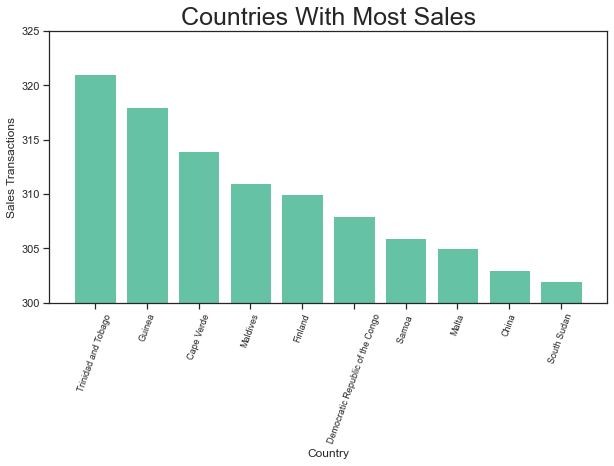

Where we should build new shipping center:
The country we should build our shipping center in is Finland because it's the country with the highest sales that's also nowhere near the other shipping centers. Cape Verde has higher sales than Finland, but it's near Guinea where a shipping center already is.




In [14]:
# This code creates a variable called grouping and groups the data in newSales by Country using groupby(). A count method is
# added to it and values are sorted by Order ID in descending order using sort_values(). Only the top 10 results are shown
# using head(). A variable called countryData is created that passes Order ID into grouping to count the Order IDs for each
# country. countryData is printed to show the top ten counts. A function called createBarChart is created that has 7
# parameters that specify the data to be used for the chart, the title of it, limits for y range, etc. The chart is created
# using different Matplotlib methods such as bar(), title(), figure(), show(), etc. A call is made for createBarChart to
# create a bar chart for countryData. A variable called newWarehouse is created that contains a string explaining where we
# should build the new shipping center based on the data. newWarehouse is printed.

grouping = newSales.groupby(['Country']).count().sort_values(by=['Order ID'], ascending= False).head(10)
countryData = grouping['Order ID']
print("Top ten countries with most sales:")
print(countryData)
print("\n")

def createBarChart(data, title, xlabel, ylabel, yLimMin, yLimMax, rotation):
    plt.figure(figsize=(10, 5))
    plt.bar(data.index, data.values)
    plt.title(title,size=25)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(yLimMin,yLimMax)
    plt.xticks(rotation=rotation,size=9)
    plt.show()

createBarChart(countryData,'Countries With Most Sales', 'Country', 'Sales Transactions', 300, 325, 70)


print("Where we should build new shipping center:")
newWarehouse = "The country we should build our shipping center in is Finland because it's the country with the highest sales that's also nowhere near the other shipping centers. Cape Verde has higher sales than Finland, but it's near Guinea where a shipping center already is.\n\n"
print(newWarehouse)

### 1 (2)

In [15]:
# This code creates a function called putDatainList that concatenates the data in a series into strings, which are then
# appended to a list. This first done by turning the data into a Pandas DataFrame using pd.DataFrame(). Then, a FOR loop is
# used to iterate x through the length of the DataFrame (the number of rows). For each iteration, a string is appended to a
# list (specified in parameter statementList) that includes the index of the row at index x and the value of a column
# (column specified in parameter index) at an index of x. The list is then returned. The function is first called for
# countryData to put the data strings in list countryStatements. An error was seen at index 6, which was corrected. The final
# resulting countryStatements list is printed below.

countryStatements = []

def putDatainList(data, statementList, index):

    df = pd.DataFrame(data)

    for x in range(0,len(df.index)):
        statementList.append(f"{df.index[x]}: {df.loc[df.index[x]][index]}\n")

    return statementList

putDatainList(countryData, countryStatements, 'Order ID')

countryStatements[6] = "Samoa: 306\n"
print("This is the list that will be written to the rankings file:")
print(countryStatements)

This is the list that will be written to the rankings file:
['Trinidad and Tobago: 321\n', 'Guinea: 318\n', 'Cape Verde: 314\n', 'Maldives: 311\n', 'Finland: 310\n', 'Democratic Republic of the Congo: 308\n', 'Samoa: 306\n', 'Malta: 305\n', 'China: 303\n', 'South Sudan: 302\n']


In [16]:
# This code creates a function called editRankingsFile that edits a file called MM_Rankings.txt. It uses four parameters
# that specify the mode to edit the file with in with open(), what header statement will be written into the file, what the
# data statements are, and what analysis statement will be written in at the end. The file is then read line by line to
# check how it looks using "r+" mode and a FOR loop to print out each line of the file. First, arguments for the country
# sales data is passed through the function that use "w+" mode to create MM_Rankings.txt and write to it. A header statement,
# countryStatements, and newWarehouse are written into the file through the function. The resulting file is shown below.

def editRankingsFile(mode, headerStatement, dataStatements, analysisStatement):

    with open("ProjectDS/MM_Rankings.txt", mode) as edit:
        edit.write(headerStatement)
        edit.writelines(dataStatements)
        edit.write(analysisStatement)
        
    with open("ProjectDS/MM_Rankings.txt", "r+") as reader:
        for line in reader:
            print(line, end=' ')

print("MM_Rankings.txt current state:\n")
editRankingsFile("w+", "Countries Most Sales Transactions:\n", countryStatements, newWarehouse)

MM_Rankings.txt current state:

Countries Most Sales Transactions:
 Trinidad and Tobago: 321
 Guinea: 318
 Cape Verde: 314
 Maldives: 311
 Finland: 310
 Democratic Republic of the Congo: 308
 Samoa: 306
 Malta: 305
 China: 303
 South Sudan: 302
 The country we should build our shipping center in is Finland because it's the country with the highest sales that's also nowhere near the other shipping centers. Cape Verde has higher sales than Finland, but it's near Guinea where a shipping center already is.
 
 

### 2 (1)

In [17]:
# This code determines the count of online and offline sales using similar methods from before to group by Sales Channel,
# sort by Sales Channel alphabetically, and count the Order IDs for each Sales Channel. The data is saved in salesChannelData
# and is printed.

grouping = newSales.groupby(['Sales Channel']).count().sort_values(by=['Sales Channel'], ascending =False)
salesChannelData = grouping['Order ID']
print("Count of offline and online orders:")
print(salesChannelData)

Count of offline and online orders:
Sales Channel
Online     30183
Offline    19788
Name: Order ID, dtype: int64


### 2 (2)

In [18]:
# This code functions similarly to 2 (1), except now Order IDs are counted for each Order Priority type. The data is saved
# into orderPriorityData and is printed.

grouping = newSales.groupby(['Order Priority']).count()
orderPriorityData = grouping['Order ID']

print("Count of orders in each order priority:")
print(orderPriorityData)

Count of orders in each order priority:
Order Priority
C     5012
H    15094
L     9984
M    19881
Name: Order ID, dtype: int64


### 2 (3)

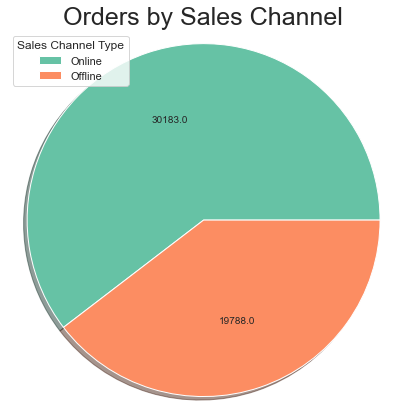

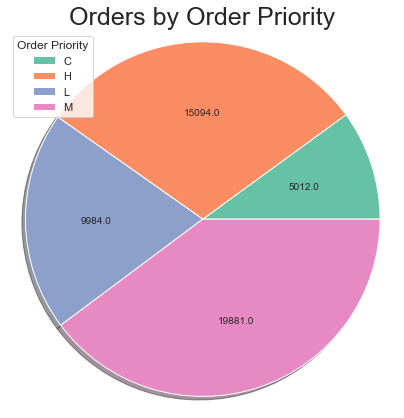

In [19]:
# This code creates a couple functions called absolute_value and createPieChart that help to create pie charts. Firstly, in
# createPieChart, parameters are set that determine the data to be graphed, the title of the chart, and the title of the legend.
# The chart is then created in the function using Matplotlib methods such as pie(), title(), legend(), axis(), etc. The
# absolute_value function helps to turn the percentages of the pie chart into absolute values by dividing the percentage by
# 100, multiplying that by the total number of orders (49971), and returning that value for autopct in pie(). Two calls are
# made for createPieChart that create pie charts for salesChannelData and orderPriorityData.

def absolute_value(val):
    a  = np.round(val/100.*49971, 0)
    return a

def createPieChart(data, title,legendTitle):
    plt.figure(figsize=(7, 7))
    plt.pie(data, shadow=True, autopct=absolute_value)
    plt.title(title, size = 25)
    plt.legend(loc=2, title=legendTitle, labels=data.index)
    plt.axis('equal')
    plt.show()

createPieChart(salesChannelData, "Orders by Sales Channel", "Sales Channel Type")
createPieChart(orderPriorityData, "Orders by Order Priority", "Order Priority")

### 2 (4)

In [20]:
# This code uses the putDatainList function to put the data from salesChannelData and orderPriorityData into strings then into
# the lists salesChannelStatements and orderPriorityStatements, respectively. The calls for the function are printed to
# double check the lists.

salesChannelStatements = []
orderPriorityStatements = []

print("Lists that will be appended to rankings file:")
print(putDatainList(salesChannelData, salesChannelStatements, 'Order ID'))
print(putDatainList(orderPriorityData, orderPriorityStatements, 'Order ID'))

Lists that will be appended to rankings file:
['Online: 30183\n', 'Offline: 19788\n']
['C: 5012\n', 'H: 15094\n', 'L: 9984\n', 'M: 19881\n']


In [21]:
# This code makes two calls for the editRankingsFile function to append salesChannelStatements, orderPriorityStatements, and
# different header/analysis statements for each to MM_Rankings.txt. Notably, "a+" mode is used this time to append to the file
# and not overwrite it. The state of the file after each append is printed through the function and shown below.

print("MM_Rankings.txt current state:\n")
editRankingsFile("a+", "Sales Channels:\n", salesChannelStatements, "We do more online sales.\n\n")

print("MM_Rankings.txt current state:\n")
editRankingsFile("a+", "Order Priorities:\n", orderPriorityStatements, "We do the most M order priorities.\n\n")

MM_Rankings.txt current state:

Countries Most Sales Transactions:
 Trinidad and Tobago: 321
 Guinea: 318
 Cape Verde: 314
 Maldives: 311
 Finland: 310
 Democratic Republic of the Congo: 308
 Samoa: 306
 Malta: 305
 China: 303
 South Sudan: 302
 The country we should build our shipping center in is Finland because it's the country with the highest sales that's also nowhere near the other shipping centers. Cape Verde has higher sales than Finland, but it's near Guinea where a shipping center already is.
 
 Sales Channels:
 Online: 30183
 Offline: 19788
 We do more online sales.
 
 MM_Rankings.txt current state:

Countries Most Sales Transactions:
 Trinidad and Tobago: 321
 Guinea: 318
 Cape Verde: 314
 Maldives: 311
 Finland: 310
 Democratic Republic of the Congo: 308
 Samoa: 306
 Malta: 305
 China: 303
 South Sudan: 302
 The country we should build our shipping center in is Finland because it's the country with the highest sales that's also nowhere near the other shipping centers. Cape

### 3 (1)

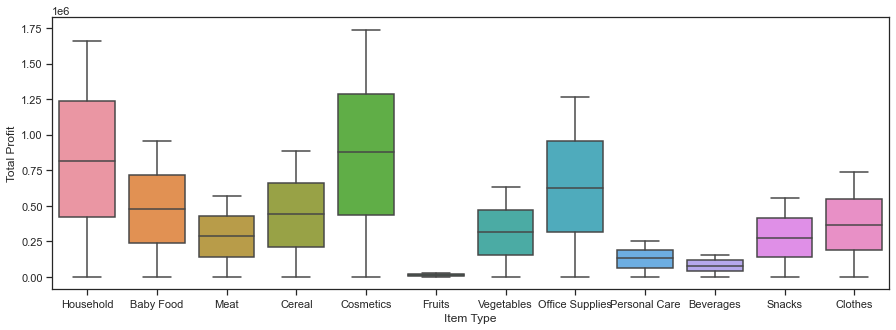

In [264]:
# This code creates a boxplot for the different item types showing the distribution of total profits for each. This is done
# using Seaborn's boxplot() and indexes to group newSales by Item Type then plot the distribution of Total Profit.

plt.figure(figsize=(15, 5))
ax = sns.boxplot(newSales['Item Type'], newSales['Total Profit'])

### 3 (2)

In [231]:
# This code uses similar methods from before to group newSales by Item Type, then find the sum of Total Profit for each using
# sum(). The data is rounded to two decimals using round(), saved to itemTypeData, and itemTypeData is printed.

grouping = newSales.groupby(['Item Type']).sum()
itemTypeData = round(grouping['Total Profit'],2)

print("Sum of total profits for each item type:")
print(itemTypeData)

Sum of total profits for each item type:
Item Type
Baby Food         1942865748.12
Beverages          327559249.08
Cereal            1824726412.29
Clothes           1520832019.68
Cosmetics         3638407966.75
Fruits              51010570.92
Household         3401180998.06
Meat              1196342404.40
Office Supplies   2605440187.50
Personal Care      535250525.60
Snacks            1149715758.72
Vegetables        1322639660.24
Name: Total Profit, dtype: float64


### 3 (3)

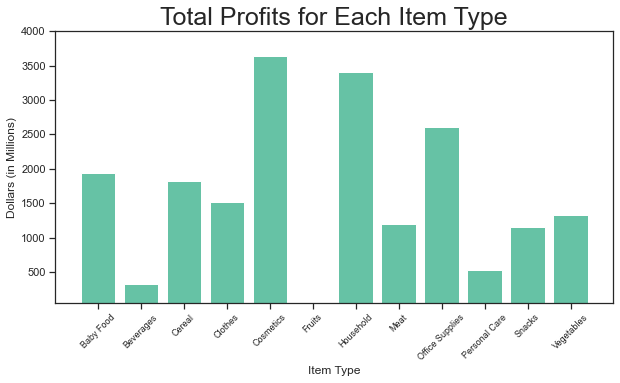

In [262]:
# This code creates a bar chart for itemTypeData by doing a call for the createBarChart function. Notably, the data is
# divided by a million to make the numbers more digestible.

createBarChart(itemTypeData/1000000,'Total Profits for Each Item Type', 'Item Type', 'Dollars (in Millions)', 50, 4000, 45)

### 3 (4)

In [55]:
# This code lists the top three Item Types with the most sales in descending order using similar methods from before
# sort_values() to sort by Total Profit, head(3) to list the top 3, etc. The information is rounded to two decimals using two,
# saved into itemTypeDataTop3, and itemTypeDataTop3 is printed.

grouping = newSales.groupby(['Item Type']).sum().sort_values(by=['Total Profit'], ascending= False).head(3)
itemTypeDataTop3 = round(grouping['Total Profit'],2)
print("Top 3 item types that brought in the most profit:")
print(itemTypeDataTop3)

Top 3 item types that brought in the most profit:
Item Type
Cosmetics         3638407966.75
Household         3401180998.06
Office Supplies   2605440187.50
Name: Total Profit, dtype: float64


### 3 (5)

In [56]:
# A call is made for the putDatainList function to put itemTypeDataTop3 into the list itemTypeStatements. The call is printed
# in order to check the list.

itemTypeStatements = []

print("Lists that will be appended to rankings file:")
print(putDatainList(itemTypeDataTop3, itemTypeStatements, 'Total Profit'))

Lists that will be appended to rankings file:
['Cosmetics: 3638407966.75\n', 'Household: 3401180998.06\n', 'Office Supplies: 2605440187.5\n']


In [57]:
# This code calls editRankingsFile to append the itemTypeStatements and other string statements that are headers or analyze
# the data. The current state of the file is printed through the function.

print("MM_Rankings.txt current state:\n")
editRankingsFile("a+", "Highest Selling Items:\n", itemTypeStatements, "We profited from Cosmetics the most.")

MM_Rankings.txt current state:

Countries Most Sales Transactions:
 Trinidad and Tobago: 321
 Guinea: 318
 Cape Verde: 314
 Maldives: 311
 Finland: 310
 Democratic Republic of the Congo: 308
 Samoa: 306
 Malta: 305
 China: 303
 South Sudan: 302
 The country we should build our shipping center in is Finland because it's the country with the highest sales that's also nowhere near the other shipping centers. Cape Verde has higher sales than Finland, but it's near Guinea where a shipping center already is.
 
 Sales Channels:
 Online: 30183
 Offline: 19788
 We do more online sales.
 
 Order Priorities:
 C: 5012
 H: 15094
 L: 9984
 M: 19881
 We do the most M order priorities.
 
 Highest Selling Items:
 Cosmetics: 3638407966.75
 Household: 3401180998.06
 Office Supplies: 2605440187.5
 We profited from Cosmetics the most. 

### 3 (6)

The boxplot shows a plot of the distribution of profits that orders have for each item type. From the plot, cosmetics, household, and office supplies types seem to have the largest variance. This is intriguing because all three had the highest total profits out of all the item types. This indicates that the orders for these item types are quite variable. For example, some orders for cosmetics are significantly higher than other cosmetic orders. Marvel Mart should be cognizant of this and understand that if these high profit orders aren't placed again, the total profits for these item types will decline.

### 4 (1)

In [58]:
# This code code finds the sum of all the requested columns using an index of newSales and sum. The answers are rounded to
# two decimal places (except for units sold) using round() and saved to 5 different variables. A string is created that
# concatenates the variables into statements that explain what the sum for each column is and is saved into sumStatements.
# sumStatements is then printed.

sumUS = newSales['Units Sold'].sum()
sumUC = round(newSales['Unit Cost'].sum(),2)
sumTR = round(newSales['Total Revenue'].sum(),2)
sumTC = round(newSales['Total Cost'].sum(),2)
sumTP = round(newSales['Total Profit'].sum(),2)

sumStatements = f"Sums:\nUnits Sold: {sumUS}\nUnit Cost: ${sumUC}\nTotal Revenue: ${sumTR}\nTotal Cost: ${sumTC}\nTotal Profit: ${sumTP}\n\n"

print(sumStatements)

Sums:
Units Sold: 249818150
Unit Cost: $9360768.32
Total Revenue: $66145004417.17
Total Cost: $46629032915.81
Total Profit: $19515971501.36




### 4 (2)

In [59]:
# This code functions similarly to the code from 4 (1), except now the averages for each column is found using mean(). The
# statements for the columns are saved into avgStatements and printed.

avgUS = round(newSales['Units Sold'].mean(),2)
avgUC = round(newSales['Unit Cost'].mean(),2)
avgTR = round(newSales['Total Revenue'].mean(),2)
avgTC = round(newSales['Total Cost'].mean(),2)
avgTP = round(newSales['Total Profit'].mean(),2)

avgStatements = f"Averages:\nUnits Sold: {avgUS}\nUnit Cost: ${avgUC}\nTotal Revenue: ${avgTR}\nTotal Cost: ${avgTC}\nTotal Profit: ${avgTP}\n\n"

print(avgStatements)

Averages:
Units Sold: 4999.26
Unit Cost: $187.32
Total Revenue: $1323667.82
Total Cost: $933121.87
Total Profit: $390545.95




### 4 (3)

In [60]:
# This code functions similarly to the code from 4 (1), except now the maximums for each column is found using max(). The
# statements for the columns are saved into maxStatements and printed.

maxUS = newSales['Units Sold'].max()
maxUC = round(newSales['Unit Cost'].max(),2)
maxTR = round(newSales['Total Revenue'].max(),2)
maxTC = round(newSales['Total Cost'].max(),2)
maxTP = round(newSales['Total Profit'].max(),2)

maxStatements = f"Maximums:\nUnits Sold: {maxUS}\nUnit Cost: ${maxUC}\nTotal Revenue: ${maxTR}\nTotal Cost: ${maxTC}\nTotal Profit: ${maxTP}"

print(maxStatements)

Maximums:
Units Sold: 10000
Unit Cost: $524.96
Total Revenue: $6682031.73
Total Cost: $5249075.04
Total Profit: $1738178.39


### 4 (4)

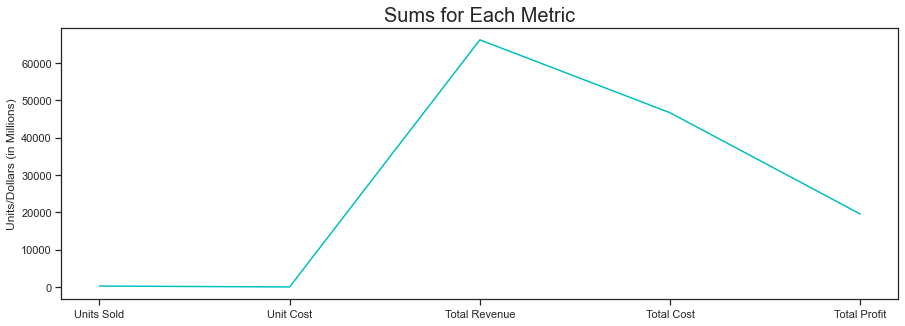

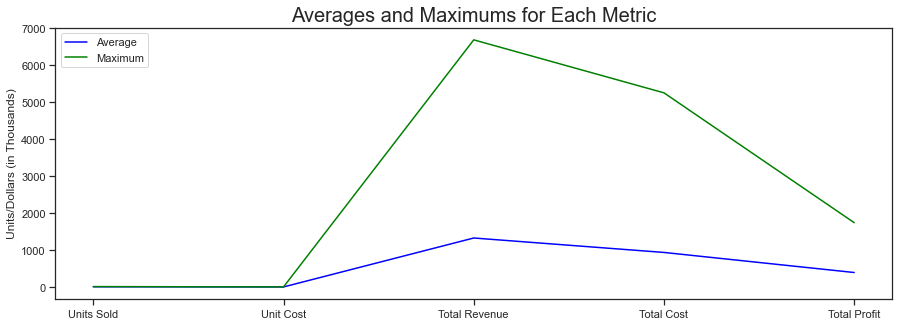

In [61]:
# This code creates line plots for the sums, averages, and maximums calculated. This is done using Matplotlib. Firstly, a
# variable called xLabelList is created that holds a list of the names of the five columns. Next, a plot for the sums is done
# using methods such as plot(), title(), figure(), etc. Notbaly, the sum variables are divided by a million to make the
# numbers more digestible. xLabelList is used for the x values. Next, a plot for both the averages and maximums is created
# using similar methods. Notably, the y values are divided by 1000 this time. The maximum and average lines are given different
# colors so that they're distinguishable.

xLabelList = ['Units Sold','Unit Cost','Total Revenue','Total Cost','Total Profit']

plt.figure(figsize=(15, 5))
plt.plot(xLabelList, [sumUS/1000000,sumUC/1000000,sumTR/1000000,sumTC/1000000,sumTP/1000000],'-c')
plt.title('Sums for Each Metric', size=20)
plt.ylabel('Units/Dollars (in Millions)')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(xLabelList, [avgUS/1000,avgUC/1000,avgTR/1000,avgTC/1000,avgTP/1000],'-b', xLabelList, [maxUS/1000,maxUC/1000,maxTR/1000,maxTC/1000,maxTP/1000],'-g')
plt.title('Averages and Maximums for Each Metric', size=20)
plt.legend(loc=2, labels=['Average','Maximum'])
plt.ylabel('Units/Dollars (in Thousands)')
plt.show()

### 4 (5)

In [171]:
# This code writes the variables sumStatements, avgStatements, and maxStatements to a file called MM_Calc.txt using with
# open(), "w+" mode and writelines(). The file is then read back line for line using a FOR loop and "r+" and printed.

with open("ProjectDS/MM_Calc.txt", "w+") as writer:
    writer.writelines(sumStatements)
    writer.writelines(avgStatements)
    writer.writelines(maxStatements)
        
with open("ProjectDS/MM_Calc.txt", "r+") as reader:
    for line in reader:
        print(line, end=' ')

Sums:
 Units Sold: 249818150
 Unit Cost: $9360768.32
 Total Revenue: $66145004417.17
 Total Cost: $46629032915.81
 Total Profit: $19515971501.36
 
 Averages:
 Units Sold: 4999.26
 Unit Cost: $187.32
 Total Revenue: $1323667.82
 Total Cost: $933121.87
 Total Profit: $390545.95
 
 Maximums:
 Units Sold: 10000
 Unit Cost: $524.96
 Total Revenue: $6682031.73
 Total Cost: $5249075.04
 Total Profit: $1738178.39 

## Part 3: Cross Reference Statistics

### 1

In [240]:
# This code first creates an empty list called regionList that will hold all the regions in it. A FOR loop is created that
# runs x in the range of newSales and iterates through all the rows. It appends the value in column 'Region' to regionList
# using indexes and append(). It then gets rid of any duplicates by saving regionList to list(set(regionList)). The final
# regionList is printed as well the length.

regionList = []
for x in range(0,len(newSales)):
    regionList.append(newSales.loc[newSales.index[x]]['Region'])
    regionList = list(set(regionList))

print("List of all the regions:")
print(regionList)
print(len(regionList))

List of all the regions:
['Asia', 'Central America and the Caribbean', 'Sub-Saharan Africa', 'Middle East and North Africa', 'North America', 'Australia and Oceania', 'Europe']
7


In [241]:
# An empty list with 7 empty nested lists (for each region) is created in countryList. A FOR loop is created that iterates
# through each row of newSales. Another FOR loop is ran within this loop that will iterate through the region list. Firstly,
# an IF statement is ran to check if the value in Region is equal to the index of y (part of the second loop) of the
# regionList. If it is, The Country value of that row is inserted to countryList at that index of y. countryList at the
# index of y is then saved as list(set(listname)) to get rid of duplicates. The final countryList is then printed that has
# the countries for each region grouped into seperate lists.

countryList = [[],[],[],[],[],[],[]]

for x in range(0,len(newSales)):
    for y in range(0, len(regionList)):
        if newSales.loc[newSales.index[x]]['Region'] == regionList[y]:
            countryList[y].insert(0, newSales.loc[newSales.index[x]]['Country'])
            countryList[y] = list(set(countryList[y]))

print("Nested list with every country in a region grouped together:")
print(countryList)

Nested list with every country in a region grouped together:
[['Taiwan', 'Bhutan', 'Indonesia', 'Brunei', 'Maldives', 'Cambodia', 'Uzbekistan', 'Bangladesh', 'Myanmar', 'Philippines', 'Tajikistan', 'Vietnam', 'Kyrgyzstan', 'China', 'Laos', 'India', 'Sri Lanka', 'North Korea', 'Japan', 'South Korea', 'Malaysia', 'Nepal', 'Turkmenistan', 'Kazakhstan', 'Singapore', 'Mongolia', 'Thailand'], ['Saint Vincent and the Grenadines', 'Saint Lucia', 'Dominican Republic', 'Cuba', 'Costa Rica', 'Panama', 'Haiti', 'The Bahamas', 'Barbados', 'Antigua and Barbuda ', 'Jamaica', 'Guatemala', 'Trinidad and Tobago', 'Nicaragua', 'El Salvador', 'Saint Kitts and Nevis ', 'Grenada', 'Honduras', 'Dominica', 'Belize'], ['Sudan', 'Ethiopia', 'Gabon', 'Mauritania', 'Uganda', 'Central African Republic', 'South Africa', 'Eritrea', 'Democratic Republic of the Congo', 'Rwanda', 'Lesotho', 'The Gambia', 'Kenya', 'Togo', 'Sierra Leone', "Cote d'Ivoire", 'Mozambique', 'Madagascar', 'Swaziland', 'Malawi', 'Equatorial Gui

In [242]:
# This code first runs a FOR loop to check how many items (countries) are in each nested loop to double check accuracy. Then,
# an empty list called addNull is created. A FOR loop is ran that iterates x through the length of the countryList. The
# difference between 48 (the largest nested list in countryList) and the length of countryList at index x (one of the nested
# lists) is appended to addNull for every nested list. These numbers will be used to determine how many empty spaces will
# be added to the nested lists. Another FOR loop is then ran that runs x for every nested list in countryList. Another FOR
# loop in this loop runs the range of addNull at index of x. In this loop, an empty space is appended to countryList at the
# index of x for as long as addNull is at this index. regionDict is then created that zips the regionList and countryList
# together into one dictionary using zip() and dict(). The dictionary is then printed.

print("Length of each nested list in countryList:")
for x in range(0, len(countryList)):
    print(len(countryList[x]))

addNull = []
for x in range(0, len(countryList)):
    addNull.append(48-len(countryList[x]))
print("\nHow many nulls will be added to each nested list:")
print(addNull)

for x in range(0, len(countryList)):
    for y in range(0, addNull[x]):
        countryList[x].append('')

regionDict = dict(zip(regionList,countryList))
 
print("\nThe dictionary of regionList and countryList combined:")
print(regionDict)

Length of each nested list in countryList:
27
20
48
23
4
15
48

How many nulls will be added to each nested list:
[21, 28, 0, 25, 44, 33, 0]

The dictionary of regionList and countryList combined:
{'Asia': ['Taiwan', 'Bhutan', 'Indonesia', 'Brunei', 'Maldives', 'Cambodia', 'Uzbekistan', 'Bangladesh', 'Myanmar', 'Philippines', 'Tajikistan', 'Vietnam', 'Kyrgyzstan', 'China', 'Laos', 'India', 'Sri Lanka', 'North Korea', 'Japan', 'South Korea', 'Malaysia', 'Nepal', 'Turkmenistan', 'Kazakhstan', 'Singapore', 'Mongolia', 'Thailand', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'Central America and the Caribbean': ['Saint Vincent and the Grenadines', 'Saint Lucia', 'Dominican Republic', 'Cuba', 'Costa Rica', 'Panama', 'Haiti', 'The Bahamas', 'Barbados', 'Antigua and Barbuda ', 'Jamaica', 'Guatemala', 'Trinidad and Tobago', 'Nicaragua', 'El Salvador', 'Saint Kitts and Nevis ', 'Grenada', 'Honduras', 'Dominica', 'Belize', '', '', '', '', '', '', '', '', '

### 2

In [225]:
# This code saves regionDict to a file called Countries_By_Region using the same processes as before, csv.writer, and zip().

with open("ProjectDS/Countries_By_Region.csv", "w+", newline ="") as csv_file: 
    writer = csv.writer(csv_file)
    writer.writerow(regionDict.keys())
    writer.writerows(zip(*regionDict.values()))